# Important steps
* load data
* remove label column
* change categorial columns to numerical
* use hierarchical clustering (dendrogram)
* use kmeans with elbow crit
* use power bi or python to analyse characteristics per cluster

# Prepare data

In [1]:
#load data
import pandas as pd
data = pd.read_csv("cluster_data_E1T2HW.csv")
data.head()

,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender
0,SO43697,3578.27 €,1,4,8,70000,Bachelors,Management,1,3,11,S,0,5,M
1,SO43698,3399.99 €,1,4,8,20000,High School,Manual,0,0,1,S,3,3,F
2,SO43699,3399.99 €,1,4,8,40000,High School,Professional,1,3,11,S,0,5,F
3,SO43700,699.10 €,1,4,8,80000,Graduate Degree,Management,1,2,2,M,0,4,M
4,SO43701,3399.99 €,1,4,8,70000,Bachelors,Professional,0,1,10,S,0,0,F


In [2]:
import numpy as np
#change cat values to numerical

#Gender (M = 1, F = 0)
data["Gender"] =data["Gender"].astype('category')
data["Gender"] =data["Gender"].cat.codes

In [3]:
#MaritalStatus M=1, S=0
data["MaritalStatus"] =data["MaritalStatus"].astype('category')
data["MaritalStatus"] =data["MaritalStatus"].cat.codes

#data.head()

In [4]:
#education: ordinal scale -> use pd.df.map()
import numpy as np
print(data.groupby("Education")["Education"].count())
print(np.unique(data["Education"]))
print(type(data.loc[0,"Education"]))
print(data["Education"].head())

Education
Bachelors              8167
Graduate Degree        4666
High School            4568
Partial College        7234
Partial High School    2048
Name: Education, dtype: int64
['Bachelors' 'Graduate Degree' 'High School' 'Partial College'
 'Partial High School']
<class 'str'>
0          Bachelors
1        High School
2        High School
3    Graduate Degree
4          Bachelors
Name: Education, dtype: object


scale derived from scatter edu vs. average income in power bi
<img src="scatter_edu_income.png" width="450" height="450">


In [5]:
#change "Education" to numeric column
ed_to_num = {'Partial High School':1, 
             "High School":2, 
             "Partial College":3, 
             'Bachelors':4, 
             "Graduate Degree":5}
data["Education"] = data["Education"].map(ed_to_num)
data.head()

,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender
0,SO43697,3578.27 €,1,4,8,70000,4,Management,1,3,11,1,0,5,1
1,SO43698,3399.99 €,1,4,8,20000,2,Manual,0,0,1,1,3,3,0
2,SO43699,3399.99 €,1,4,8,40000,2,Professional,1,3,11,1,0,5,0
3,SO43700,699.10 €,1,4,8,80000,5,Management,1,2,2,0,0,4,1
4,SO43701,3399.99 €,1,4,8,70000,4,Professional,0,1,10,1,0,0,0


In [6]:
#do the same ordinal scaling for occupation?
#explore first
print(data.groupby("Occupation")["Occupation"].count())
print(np.unique(data["Occupation"]))
print(type(data.loc[0,"Occupation"]))
print(data["Occupation"].head())

Occupation
Clerical          4267
Management        4636
Manual            3085
Professional      8365
Skilled Manual    6330
Name: Occupation, dtype: int64
['Clerical' 'Management' 'Manual' 'Professional' 'Skilled Manual']
<class 'str'>
0      Management
1          Manual
2    Professional
3      Management
4    Professional
Name: Occupation, dtype: object


 linear relationship occupation income approved
  <img src="scatter_occup_income.png" width="450" height="450">

In [7]:
#change occupation values to numerical
ed_to_num = {'Manual':1, 
             "Clerical":2, 
             "Skilled Manual":3, 
             'Professional':4, 
             "Management":5}
data["Occupation"] = data["Occupation"].map(ed_to_num)
data.head()

,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender
0,SO43697,3578.27 €,1,4,8,70000,4,5,1,3,11,1,0,5,1
1,SO43698,3399.99 €,1,4,8,20000,2,1,0,0,1,1,3,3,0
2,SO43699,3399.99 €,1,4,8,40000,2,4,1,3,11,1,0,5,0
3,SO43700,699.10 €,1,4,8,80000,5,5,1,2,2,0,0,4,1
4,SO43701,3399.99 €,1,4,8,70000,4,4,0,1,10,1,0,0,0


In [8]:
#all cols numeric?
data.dtypes

SalesOrderNumber        object
SalesAmount             object
MonthNum                 int64
WeekdayNum               int64
Loyalty in Years         int64
YearlyIncome             int64
Education                int64
Occupation               int64
HouseOwnerFlag           int64
NumberCarsOwned          int64
Max CommuteDistance      int64
MaritalStatus             int8
NumberChildrenAtHome     int64
TotalChildren            int64
Gender                    int8
dtype: object

In [9]:
#write as function
def str_cut(str):
    return str[:-2] #choose letters in string until second left (excluded)
#test
str_cut("12345.34 a")

'12345.34'

In [10]:
data["SalesAmount"]=data["SalesAmount"].apply(str_cut)

In [11]:
data["SalesAmount"] = data["SalesAmount"].astype(float)

In [12]:
data["SalesAmount"].dtype
data["SalesAmount"].head()

0    3578.27
1    3399.99
2    3399.99
3     699.10
4    3399.99
Name: SalesAmount, dtype: float64

In [13]:
#all cols numeric?
data.dtypes

SalesOrderNumber         object
SalesAmount             float64
MonthNum                  int64
WeekdayNum                int64
Loyalty in Years          int64
YearlyIncome              int64
Education                 int64
Occupation                int64
HouseOwnerFlag            int64
NumberCarsOwned           int64
Max CommuteDistance       int64
MaritalStatus              int8
NumberChildrenAtHome      int64
TotalChildren             int64
Gender                     int8
dtype: object

In [14]:
#change SalesOrderNumber to int
#backup Original beforehand
son = pd.DataFrame()
son["original"] = data["SalesOrderNumber"]
#change salesOrderNumber to int number ()
#function: extract string from third letter on
def son_int(str):
    return str[2:] 
#test
print(son_int("so12345"))

data["SalesOrderNumber"] = data["SalesOrderNumber"].apply(son_int)
data["SalesOrderNumber"] = data["SalesOrderNumber"].astype('int')

#match to original 
son["number"] = data["SalesOrderNumber"]

data.head()

12345


,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender
0,43697,3578.27,1,4,8,70000,4,5,1,3,11,1,0,5,1
1,43698,3399.99,1,4,8,20000,2,1,0,0,1,1,3,3,0
2,43699,3399.99,1,4,8,40000,2,4,1,3,11,1,0,5,0
3,43700,699.10,1,4,8,80000,5,5,1,2,2,0,0,4,1
4,43701,3399.99,1,4,8,70000,4,4,0,1,10,1,0,0,0


In [15]:
son.head()

,original,number
0,SO43697,43697
1,SO43698,43698
2,SO43699,43699
3,SO43700,43700
4,SO43701,43701


In [16]:
#final data set
data.head()

,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender
0,43697,3578.27,1,4,8,70000,4,5,1,3,11,1,0,5,1
1,43698,3399.99,1,4,8,20000,2,1,0,0,1,1,3,3,0
2,43699,3399.99,1,4,8,40000,2,4,1,3,11,1,0,5,0
3,43700,699.10,1,4,8,80000,5,5,1,2,2,0,0,4,1
4,43701,3399.99,1,4,8,70000,4,4,0,1,10,1,0,0,0


In [17]:
#extract labels
labels = list(data["SalesOrderNumber"])
samples = data.iloc[:,1:]
#print(labels.head())
#print(samples.head())

### explore and Normalize / Standardize the data with sklearn, if necessary
[explanation on when to normalize or standardize](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

array([[<AxesSubplot:title={'center':'SalesAmount'}>,
        <AxesSubplot:title={'center':'MonthNum'}>,
        <AxesSubplot:title={'center':'WeekdayNum'}>,
        <AxesSubplot:title={'center':'Loyalty in Years'}>],
       [<AxesSubplot:title={'center':'YearlyIncome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'HouseOwnerFlag'}>],
       [<AxesSubplot:title={'center':'NumberCarsOwned'}>,
        <AxesSubplot:title={'center':'Max CommuteDistance'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'NumberChildrenAtHome'}>],
       [<AxesSubplot:title={'center':'TotalChildren'}>,
        <AxesSubplot:title={'center':'Gender'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

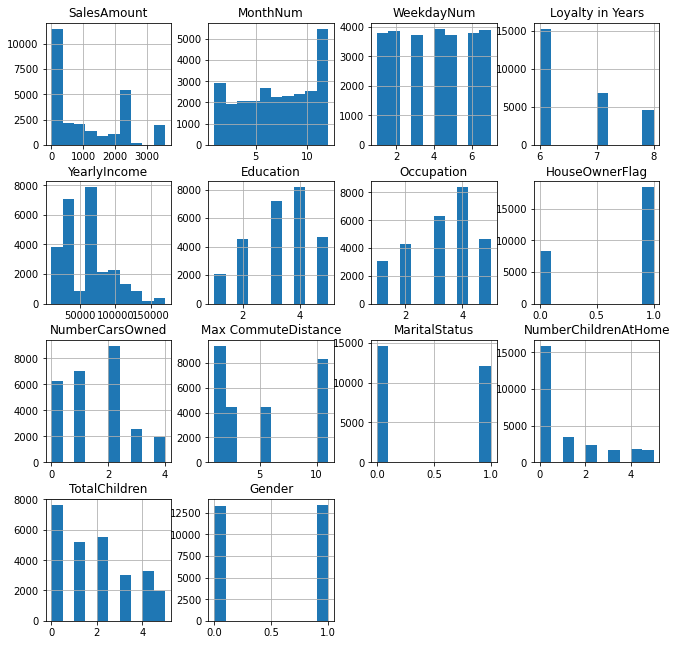

In [18]:
#explore data
samples.hist(figsize=[11,11])

Learnings: some features seem to be uniformly distributed, others normally

In [19]:
range(len(data.columns)) #use for for-loops

range(0, 15)

In [20]:
# apply scaler: normalize btw. 0,1
from sklearn.preprocessing import normalize
samples_norm = normalize(samples)

# Clustering

## apply kmeans

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (20,10)


ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples_norm) 
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    

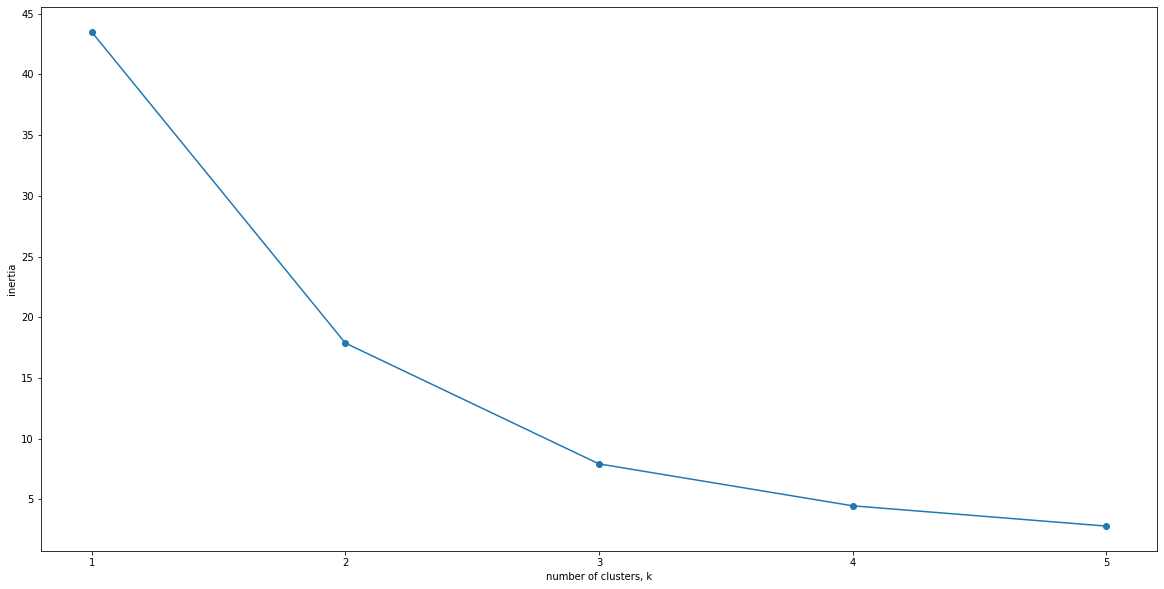

In [22]:
import matplotlib.pyplot as plt
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [23]:
#create kmeans model with cluster-n from elbow
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels_kmeans = model.fit_predict(samples)

## merge all labels in one df

In [24]:
#create df with clusterlabels per method -> load in power bi as new DimTable and analyse charcs
dim_cluster = pd.DataFrame({"SalesOrderNumber":labels, 
                            "KMeans Cluster":labels_kmeans})

In [25]:
dim_cluster.head()

,SalesOrderNumber,KMeans Cluster
0,43697,0
1,43698,1
2,43699,1
3,43700,0
4,43701,0


## create summary statistics per method per cluster 

In [26]:
#add cluster-cols to original data
data_cluster = pd.merge(data, dim_cluster, on='SalesOrderNumber', how='inner')
data_cluster.head()

,SalesOrderNumber,SalesAmount,MonthNum,WeekdayNum,Loyalty in Years,YearlyIncome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,Max CommuteDistance,MaritalStatus,NumberChildrenAtHome,TotalChildren,Gender,KMeans Cluster
0,43697,3578.27,1,4,8,70000,4,5,1,3,11,1,0,5,1,0
1,43698,3399.99,1,4,8,20000,2,1,0,0,1,1,3,3,0,1
2,43699,3399.99,1,4,8,40000,2,4,1,3,11,1,0,5,0,1
3,43700,699.10,1,4,8,80000,5,5,1,2,2,0,0,4,1,0
4,43701,3399.99,1,4,8,70000,4,4,0,1,10,1,0,0,0,0


In [27]:
#create summary statistics per group
#kmeans
summary_kmeans = data_cluster.groupby("KMeans Cluster")[data_cluster.columns].agg([np.min, np.max, np.mean, np.median])

In [28]:
#show # instances per cluster per method
print(data_cluster.groupby("KMeans Cluster")["KMeans Cluster"].count())

KMeans Cluster
0    12285
1    10889
2     3509
Name: KMeans Cluster, dtype: int64


In [29]:
pd.set_option('display.max_columns', None) #
summary_kmeans

SalesOrderNumber                               SalesAmount  \
                           amin   amax          mean   median        amin   
KMeans Cluster                                                              
0                         43697  74142  59721.314693  60032.0        2.29   
1                         43698  74147  59672.602259  59859.0        2.29   
2                         43702  74145  59270.420918  59630.0        2.29   

                                              MonthNum                        \
                   amax         mean   median     amin amax      mean median   
KMeans Cluster                                                                 
0               3578.27  1135.897458   699.10        1   12  7.087668    7.0   
1               3578.27   967.510660   588.96        1   12  7.142162    7.0   
2               3578.27  1373.073072  1174.48        1   12  7.115987    7.0   

               WeekdayNum                       Loyalty in Years       \
                     amin amax      mean median             amin amax   
KMeans Cluster                                                          
0                       1    7  4.010419    4.0                6    8   
1                       1    7  3.988245    4.0                6    8   
2                       1    7  4.031633    4.0                6    8   

                                YearlyIncome                                   \
                    mean median         amin    amax           mean    median   
KMeans Cluster                                                                  
0               6.576150    6.0        50000   90000   69158.323158   70000.0   
1               6.579300    6.0        10000   40000   28724.400771   30000.0   
2               6.751211    7.0       100000  170000  121085.779424  120000.0   

               Education                       Occupation                 \
                    amin amax      mean median       amin amax      mean   
KMeans Cluster                                                             
0                      1    5  3.720798    4.0          3    5  3.867481   
1                      1    5  2.894297    3.0          1    5  2.156488   
2                      1    5  3.322314    3.0          4    5  4.632374   

                      HouseOwnerFlag                       NumberCarsOwned  \
               median           amin amax      mean median            amin   
KMeans Cluster                                                               
0                 4.0              0    1  0.714774    1.0               0   
1                 2.0              0    1  0.656718    1.0               0   
2                 5.0              0    1  0.697635    1.0               0   

                                     Max CommuteDistance                 \
               amax      mean median                amin amax      mean   
KMeans Cluster                                                            
0                 4  1.451526    1.0                   1   11  5.758079   
1                 4  1.097897    1.0                   1   11  3.205896   
2                 4  2.950983    3.0                   1   11  6.321459   

                      MaritalStatus                        \
               median          amin amax      mean median   
KMeans Cluster                                              
0                 5.0             0    1  0.441107    0.0   
1                 2.0             0    1  0.495362    0.0   
2                 5.0             0    1  0.363066    0.0   

               NumberChildrenAtHome                       TotalChildren       \
                               amin amax      mean median          amin amax   
KMeans Cluster                                                                 
0                                 0    5  0.963614    0.0             0    5   
1                                 0    5  0.499403    0.0             0    5   
2

Results:
* Yearly Income main driver of clusters (correlates with mean SalesAmount -> lower / higher, if lower / higher income)
* Occupation correlates with high income (makes sense), education only slightly
* cars owned rise with income, as well as mean commute distance
* marital status: ++income -> rather single, low income rather married
* #children at home: correlates with income (mean=3 in ++income)


summary: YerlyIncome main driver of clusters -> further analysis in power bi?



### Final Result
* KMeans clusters by income make most sense
* cluster and visualize reduced data set with kmeans (only YearlyIncome and salesOrderNumber
* cluster again with region

In [30]:
#create new data set
data_small = data[["SalesOrderNumber", "SalesAmount", "YearlyIncome"]]
data_small.dtypes
data_small.head()

,SalesOrderNumber,SalesAmount,YearlyIncome
0,43697,3578.27,70000
1,43698,3399.99,20000
2,43699,3399.99,40000
3,43700,699.10,80000
4,43701,3399.99,70000


# Income + Regional clustering

## Prepare data

In [31]:
#load region set
import pandas as pd
sales_country = pd.read_csv("SalesByRegionCountry.csv")
sales_country.rename(columns = {'SalesOrderNumber_num':'SalesOrderNumber'}, inplace = True)
sales_country.head()

,SalesOrderNumber,Country,Region
0,43697,Canada,Canada
1,43698,France,France
2,43699,United States,Northwest
3,43700,United States,Southwest
4,43701,Australia,Australia


In [32]:
#join
data_with_region = pd.merge(data_small, sales_country, on="SalesOrderNumber", how='inner')

data_with_region.head()

,SalesOrderNumber,SalesAmount,YearlyIncome,Country,Region
0,43697,3578.27,70000,Canada,Canada
1,43698,3399.99,20000,France,France
2,43699,3399.99,40000,United States,Northwest
3,43700,699.10,80000,United States,Southwest
4,43701,3399.99,70000,Australia,Australia


In [33]:
#change to numerical col
data_with_region["Region Number"] = data_with_region["Region"]
data_with_region["Region Number"] = data_with_region["Region Number"].astype('category')
data_with_region["Region Number"] = data_with_region["Region Number"].cat.codes

#save Region_cols for later
region_cols = data_with_region[["Region","Region Number", "Country"]]

#drop Region col
data_with_region = data_with_region.drop(["Region", "Country"], axis=1)

data_with_region.head()

,SalesOrderNumber,SalesAmount,YearlyIncome,Region Number
0,43697,3578.27,70000,1
1,43698,3399.99,20000,3
2,43699,3399.99,40000,6
3,43700,699.10,80000,8
4,43701,3399.99,70000,0


In [34]:
region_cols.head()

,Region,Region Number,Country
0,Canada,1,Canada
1,France,3,France
2,Northwest,6,United States
3,Southwest,8,United States
4,Australia,0,Australia


In [35]:
#split labels from samples
labels_region = list(data_with_region["SalesOrderNumber"])
#create numerical label list
#labels_r_num = list(data_with_region["SalesOrderNumber"].astype('category').cat.codes)
samples_region = data_with_region.iloc[:,1:]

In [36]:
print(labels_region[0:5])
print(samples_region[0:5])

[43697, 43698, 43699, 43700, 43701]
   SalesAmount  YearlyIncome  Region Number
0      3578.27         70000              1
1      3399.99         20000              3
2      3399.99         40000              6
3       699.10         80000              8
4      3399.99         70000              0


In [37]:
#normalize data
# apply scaler: normalize btw. 0,1
from sklearn.preprocessing import normalize
samples_region_norm = normalize(samples_region)

## cluster by region

### kmeans

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (20,10)


ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples_region_norm) 
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



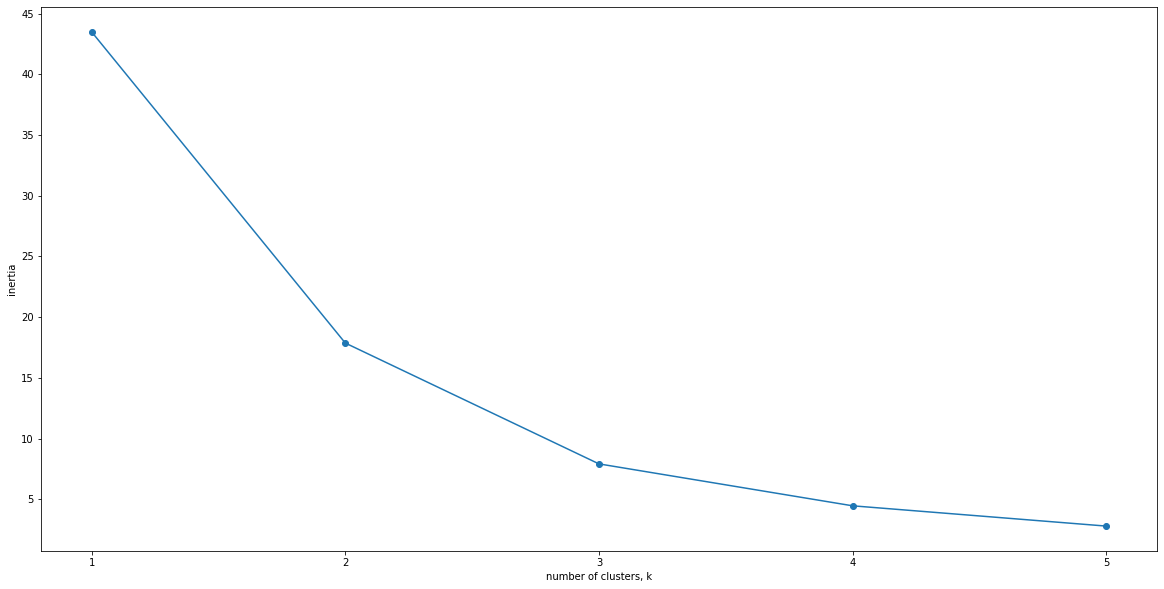

In [39]:
#plot elbow
import matplotlib.pyplot as plt
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [40]:
#create kmeans model with cluster-n from elbow
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels_kmeans_r = model.fit_predict(samples_region_norm)

## exploring regional cluster results

In [41]:
dim_cluster_r = pd.DataFrame({"SalesOrderNumber":labels_region, 
                              "KMeans Cluster":labels_kmeans_r})


In [42]:
#add cluster-cols to original data
data_cluster_r = pd.merge(data_with_region, dim_cluster_r, on='SalesOrderNumber', how='inner')
data_cluster_r.head()

,SalesOrderNumber,SalesAmount,YearlyIncome,Region Number,KMeans Cluster
0,43697,3578.27,70000,1,0
1,43698,3399.99,20000,3,1
2,43699,3399.99,40000,6,0
3,43700,699.10,80000,8,2
4,43701,3399.99,70000,0,0


### summary statistics

In [43]:
#create summary statistics per group
#kmeans
summary_kmeans_r = data_cluster_r.groupby("KMeans Cluster")[data_cluster_r.columns].agg([np.min, np.max, np.mean, np.median])

In [44]:
# distribution per cluster
print(data_cluster_r.groupby("KMeans Cluster")["KMeans Cluster"].count())

KMeans Cluster
0     4901
1      554
2    21228
Name: KMeans Cluster, dtype: int64


In [45]:
summary_kmeans_r

SalesOrderNumber                               SalesAmount  \
                           amin   amax          mean   median        amin   
KMeans Cluster                                                              
0                         43697  74146  54996.277698  51021.0      539.99   
1                         43698  74107  51092.019856  47749.5     1700.99   
2                         43700  74147  60937.888072  61057.5        2.29   

                                              YearlyIncome          \
                   amax         mean   median         amin    amax   
KMeans Cluster                                                       
0               3578.27  2382.159019  2369.96        10000   90000   
1               3578.27  2770.756606  2443.35        10000   20000   
2               3578.27   758.332238   114.46        10000  170000   

                                      Region Number                        \
                        mean   median          amin amax      mean median   
KMeans Cluster                                                              
0               39961.232402  40000.0             0    9  4.358702    4.0   
1               12292.418773  10000.0             0    9  2.855596    3.0   
2               65226.116450  60000.0             0    9  4.210571    4.0   

               KMeans Cluster                   
                         amin amax mean median  
KMeans Cluster                                  
0                           0    0  0.0    0.0  
1                           1    1  1.0    1.0  
2                           2    2  2.0    2.0

### final results

* kmeans cluster are the most balanced and have a clear dominance by YearlyIncome
* therefore, the cluster labels are saved as a new data set "Clusters" 
* this set can be used as new dimension in power bi to generate new insights

In [46]:
#create new dataset
data_cluster_final = pd.DataFrame({"SalesOrderNumber":labels_region,
                                  "Cluster Labels without Region":labels_kmeans,
                                  "Cluster Labels with Region":labels_kmeans_r})
data_cluster_final.head()

,SalesOrderNumber,Cluster Labels without Region,Cluster Labels with Region
0,43697,0,0
1,43698,1,1
2,43699,1,0
3,43700,0,2
4,43701,0,0


In [48]:
#save df
data_cluster_final.to_csv('Clusters.csv')